# U-Net Baseline Model Improvements

In this notebook, we take the U-Net baseline model (as presented in tutorial 10) as a starting point and build upon it by introducing and evaluating one improvement after the other.

In [1]:
import os
from glob import glob

from src.utils import *
from src.models import UNet
from src.pytorch_utils import *

In [ ]:
from .src.utils import *
from .src.models import UNet
from .src.pytorch_utils import *

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# get filenames of all the training samples from the original dataset
image_fns = sorted(glob(os.path.join("training", "images", "*.png")))
mask_fns = sorted(glob(os.path.join("training", "groundtruth", "*.png")))

### Original Configuration

Let us train the baseline model using the exact same configuration as shown during tutorial 10. This approach results in a F1 score of about 0.872 on the public Kaggle leaderboard.

In [ ]:
unet = UNet().to(device)
history = train_model(
    model=unet,
    image_fns_train=image_fns[:-10],
    mask_fns_train=mask_fns[:-10],
    image_fns_val=image_fns[-10:],
    mask_fns_val=mask_fns[-10:],
    n_epochs=35,
    batch_size=4,
)

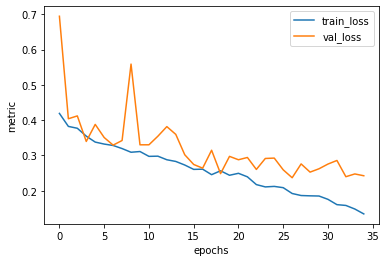

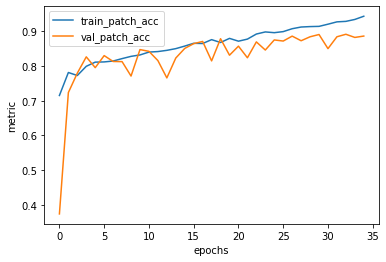

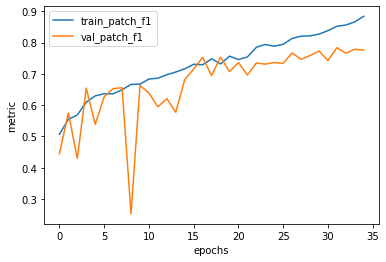

In [4]:
plot_training_history(history)

In [ ]:
preds = predict_on_test_set(unet, submission_fn="unet_baseline.csv")
plot_predictions(preds)

### Image Normalization.

Now, let us add image normalization as a preprocessing step. I.e. for each image, we compute the mean and std of each color channel and use them to normalize each channel. This addition results in a F1 score of about 0.883.

In [ ]:
unet = UNet().to(device)
history = train_model(
    model=unet,
    image_fns_train=image_fns[:-10],
    mask_fns_train=mask_fns[:-10],
    image_fns_val=image_fns[-10:],
    mask_fns_val=mask_fns[-10:],
    n_epochs=35,
    batch_size=4,
    normalize=True,
)

When comparing the training and validation metrics with the original history above, we can see that the model improves much faster now. Even when the training metrics start to diverge from the validation metrics (after epoch 15), patch accuracy and patch F1 score keeps improving. Normalizing the input images clearly has a noticeable effect, even though each U-Net block has a batch normalization layer.

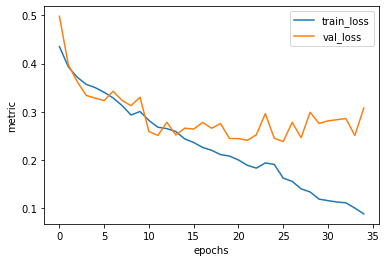

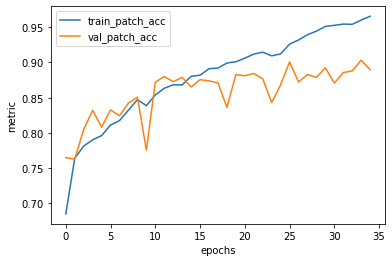

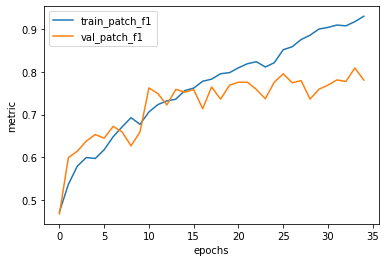

In [7]:
plot_training_history(history)

In [ ]:
preds = predict_on_test_set(unet, normalize=True, submission_fn="unet_baseline_image_norm.csv")
plot_predictions(preds)